## Seung Jun Choi in Urban Information Lab
### Introducting New Module
#### https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

### Previously, we only used Keras/TensorFlow and Sckit-learn

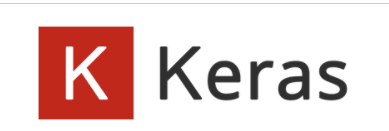

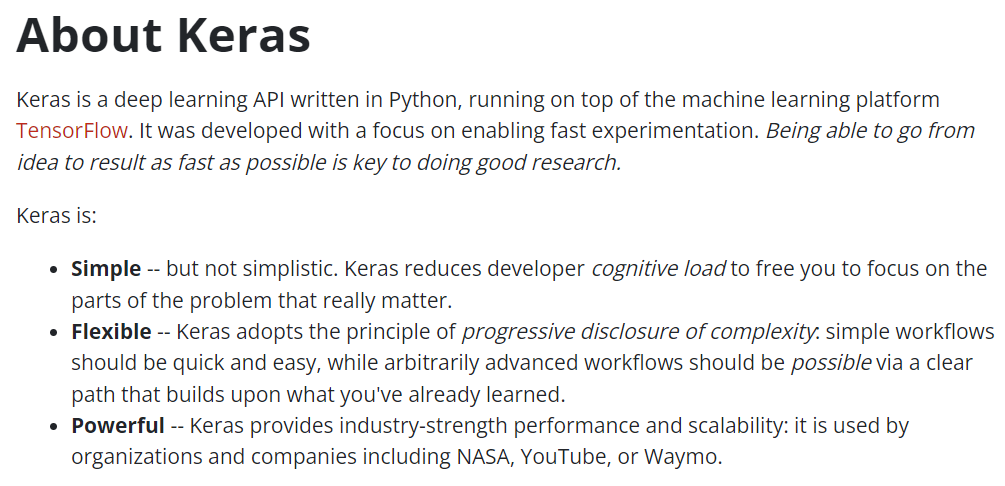

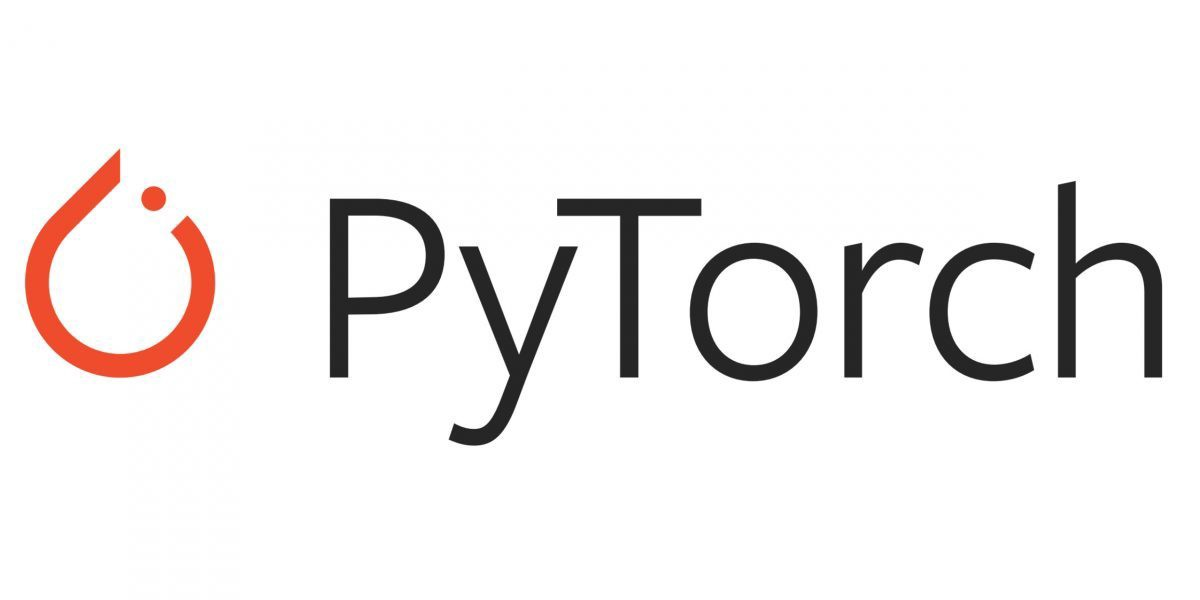

## What is PyTorch?
### PyTorch is an open-source library used in machine learning library developed using Torch library for python program. It is developed by Facebook’s AI Research lab and released in January 2016 as a free and open-source library mainly used in computer vision, deep learning, and natural language processing applications.

## Why do we need PyTorch?
### The pyTorch framework can be seen as the future of the deep learning framework. There are many deep learning frameworks getting introduced, and the most preferred frameworks are Tensorflow and PyTorch, but among all, PyTorch is emerging as a winner due to its flexibility and computation power. For machine learning and Artificial Intelligence enthusiast, PyTorch is easy to learn and will be very useful to build models.

### Mostly developers prefer PyTorch because it fits in both GPU and CPU environments

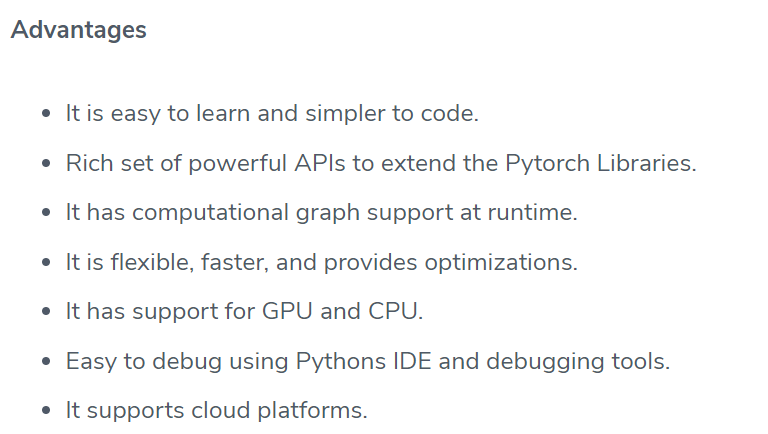

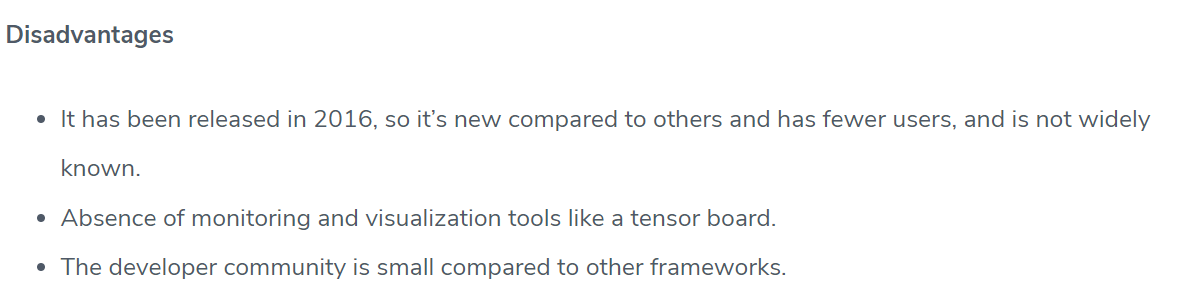

# However,

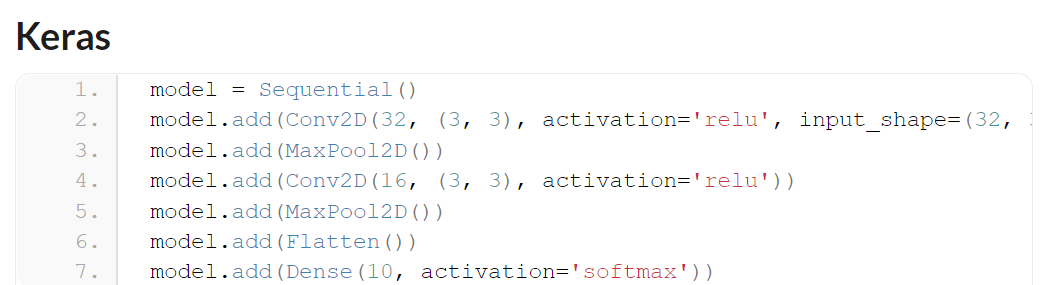

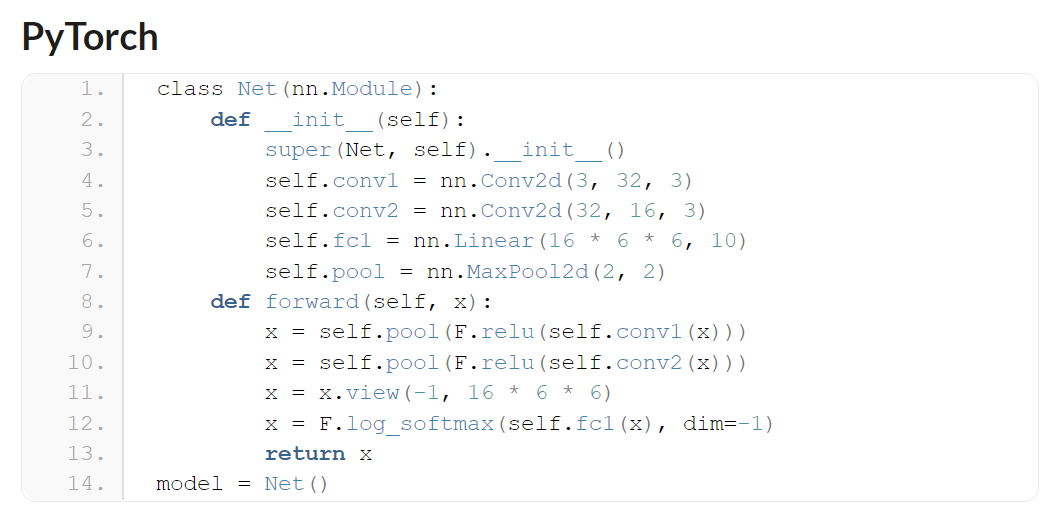

The code snippets above give a little taste of the differences between the two frameworks. As for the model training itself – it requires around 20 lines of code in PyTorch, compared to a single line in Keras. Enabling GPU acceleration is handled implicitly in Keras, while PyTorch requires us to specify when to transfer data between the CPU and GPU.

That said, Keras, being much simpler than PyTorch, is by no means a toy – it’s a serious deep learning tool used by beginners, and seasoned data scientists alike.

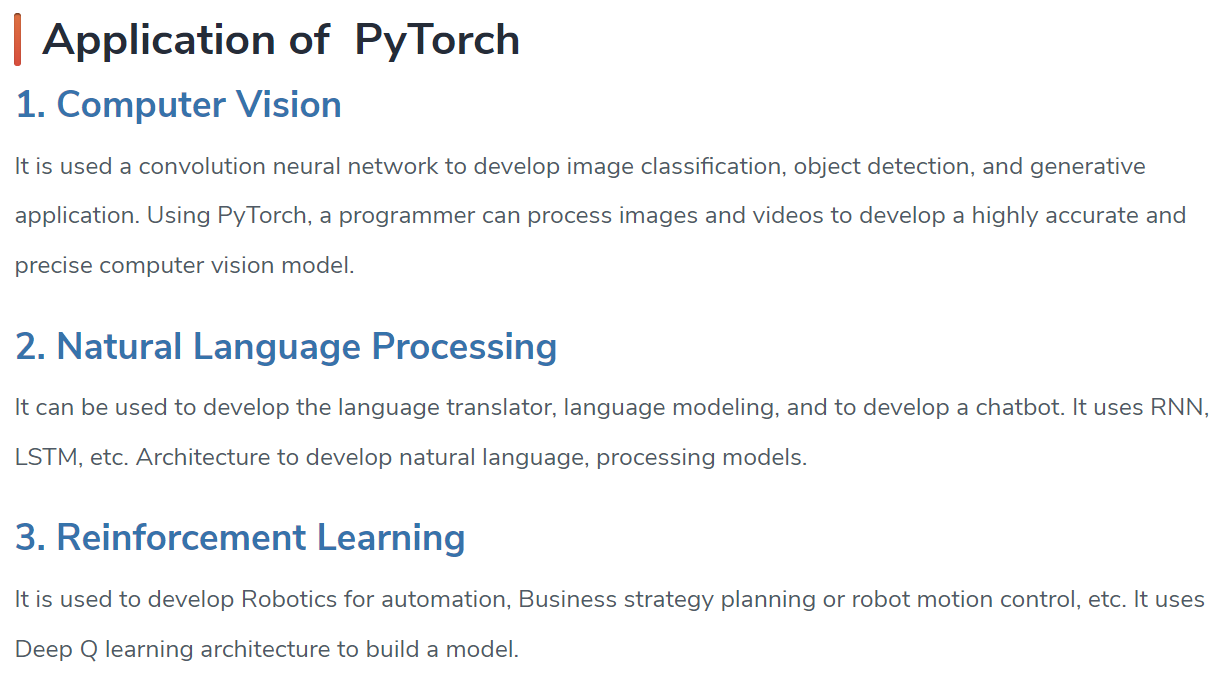

## PyTorch has a similar syntax as any other standard programming language; hence it is to learn and to make a transition in AI or Machine learning engineer.

## We’ll build a neural network to classify images in the FashionMNIST dataset.
### Along with that I'll introduce the pre-defined modules in PyTorch

### But before digging in further please pip install torch & torchvision. This will take some time.

In [15]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## We want to be able to train our model on a hardware accelerator like the GPU, if it is available. Let’s check to see if torch.cuda is available, else we continue to use the CPU.

In [16]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


MIne is CPU (Sadly)

## Define the Class
## PyTorch defines neural network by subclassing nn.Module, and initialize the neural network layers in __init__. Every nn.Module subclass implements the operations on input data in the forward method.

In [17]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

## PyTorch create an instance of NeuralNetwork, and move it to the device, and print its structure.

In [18]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


## To use the model, we pass it the input data. This executes the model’s forward, along with some background operations.

## Do not call model.forward() directly!

## Calling the model on the input returns a 10-dimensional tensor with raw predicted values for each class. We get the prediction probabilities by passing it through an instance of the nn.Softmax module.

In [19]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([0])


## Model Layers
## Let’s break down the layers in the FashionMNIST model. To illustrate it, we will take a sample minibatch of 3 images of size 28x28 and see what happens to it as we pass it through the network.

In [20]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


## We initialize the nn.Flatten layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values ( the minibatch dimension (at dim=0) is maintained).

In [21]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


## nn.Linear
## The linear layer is a module that applies a linear transformation on the input using its stored weights and biases.

In [22]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


## nn.ReLU
## Non-linear activations are what create the complex mappings between the model’s inputs and outputs. They are applied after linear transformations to introduce nonlinearity, helping neural networks learn a wide variety of phenomena.

## In this model, we use nn.ReLU between our linear layers, but there’s other activations to introduce non-linearity in your model.

In [23]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.0767,  0.1477, -0.2033, -0.9033, -0.4153, -0.1919, -0.1637,  0.1841,
         -0.1602, -0.2147, -0.4115, -0.1506,  0.3752, -0.0522, -0.6730, -0.2993,
         -0.0624,  0.7787,  0.1147, -0.2518],
        [ 0.0804,  0.4140,  0.0868, -0.7454, -0.6451,  0.2442, -0.3439,  0.2151,
          0.0602, -0.2275, -0.3890,  0.0327,  0.2976,  0.2977, -0.1436, -0.0722,
         -0.1910,  0.5914,  0.1668, -0.3131],
        [-0.3032,  0.1411,  0.1132, -0.5173, -0.3007,  0.0865, -0.4837, -0.0651,
         -0.0256, -0.0546, -0.0918, -0.3032,  0.1212,  0.0631, -0.0999,  0.0118,
         -0.4192,  0.4144,  0.3276, -0.1418]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0767, 0.1477, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1841, 0.0000,
         0.0000, 0.0000, 0.0000, 0.3752, 0.0000, 0.0000, 0.0000, 0.0000, 0.7787,
         0.1147, 0.0000],
        [0.0804, 0.4140, 0.0868, 0.0000, 0.0000, 0.2442, 0.0000, 0.2151, 0.0602,
         0.0000, 0.0000, 0.0327, 0.2976, 0.2977, 0.00

## nn.Sequential
## nn.Sequential is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can use sequential containers to put together a quick network like seq_modules.

In [24]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

## nn.Softmax
## The last linear layer of the neural network returns logits - raw values in [-infty, infty] - which are passed to the nn.Softmax module. The logits are scaled to values [0, 1] representing the model’s predicted probabilities for each class. dim parameter indicates the dimension along which the values must sum to 1.

In [25]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

## Model Parameters
## Many layers inside a neural network are parameterized, i.e. have associated weights and biases that are optimized during training. Subclassing nn.Module automatically tracks all fields defined inside your model object, and makes all parameters accessible using your model’s parameters() or named_parameters() methods.

## In this example, we iterate over each parameter, and print its size and a preview of its values.

In [26]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0116, -0.0220,  0.0267,  ...,  0.0045, -0.0355,  0.0343],
        [ 0.0088, -0.0260, -0.0300,  ..., -0.0084, -0.0090, -0.0206]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0287, 0.0357], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0083,  0.0360, -0.0346,  ...,  0.0045, -0.0232,  0.0428],
        [ 0.0123, -0.0129, -0.0423,  ...,  0.0038, -0.0395,  0.0211]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | 

## When training neural networks, the most frequently used algorithm is back propagation. In this algorithm, parameters (model weights) are adjusted according to the gradient of the loss function with respect to the given parameter.

## To compute those gradients, PyTorch has a built-in differentiation engine called torch.autograd. It supports automatic computation of gradient for any computational graph.

## Consider the simplest one-layer neural network, with input x, parameters w and b, and some loss function. It can be defined in PyTorch in the following manner:

In [27]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

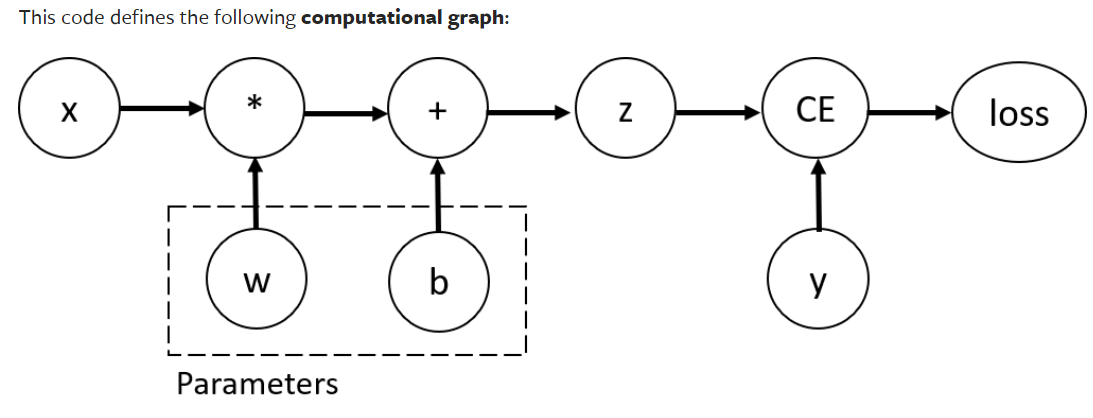

### In this network, w and b are parameters, which we need to optimize. Thus, we need to be able to compute the gradients of loss function with respect to those variables. In order to do that, we set the requires_grad property of those tensors.

### A function that we apply to tensors to construct computational graph is in fact an object of class Function. This object knows how to compute the function in the forward direction, and also how to compute its derivative during the backward propagation step. A reference to the backward propagation function is stored in grad_fn property of a tensor. You can find more information of Function in the documentation.

## LSTM in PyTorch

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [32]:
lstm = nn.LSTM(3, 3)  # Input dim is 3, output dim is 3
inputs = [torch.randn(1, 3) for _ in range(5)]  # make a sequence of length 5

# initialize the hidden state.
hidden = (torch.randn(1, 1, 3),
          torch.randn(1, 1, 3))
for i in inputs:
    # Step through the sequence one element at a time.
    # after each step, hidden contains the hidden state.
    out, hidden = lstm(i.view(1, 1, -1), hidden)

# alternatively, we can do the entire sequence all at once.
# the first value returned by LSTM is all of the hidden states throughout
# the sequence. the second is just the most recent hidden state
# (compare the last slice of "out" with "hidden" below, they are the same)
# The reason for this is that:
# "out" will give you access to all hidden states in the sequence
# "hidden" will allow you to continue the sequence and backpropagate,
# by passing it as an argument  to the lstm at a later time
# Add the extra 2nd dimension
inputs = torch.cat(inputs).view(len(inputs), 1, -1)
hidden = (torch.randn(1, 1, 3), torch.randn(1, 1, 3))  # clean out hidden state
out, hidden = lstm(inputs, hidden)
print(out)
print(hidden)

tensor([[[-0.0187,  0.1713, -0.2944]],

        [[-0.3521,  0.1026, -0.2971]],

        [[-0.3191,  0.0781, -0.1957]],

        [[-0.1634,  0.0941, -0.1637]],

        [[-0.3368,  0.0959, -0.0538]]], grad_fn=<StackBackward0>)
(tensor([[[-0.3368,  0.0959, -0.0538]]], grad_fn=<StackBackward0>), tensor([[[-0.9825,  0.4715, -0.0633]]], grad_fn=<StackBackward0>))


## Does it seems fuzy?

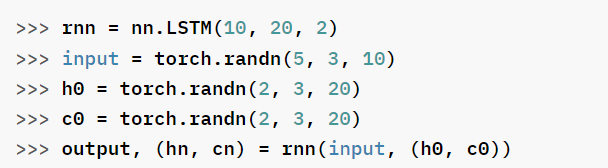

### Similar to what we did in Keras,
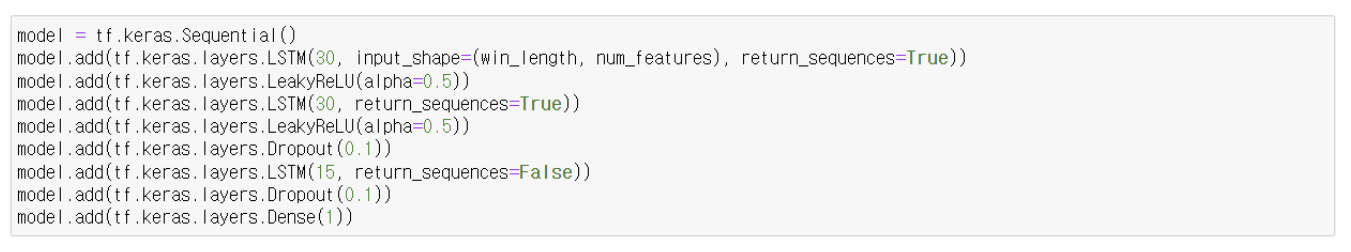

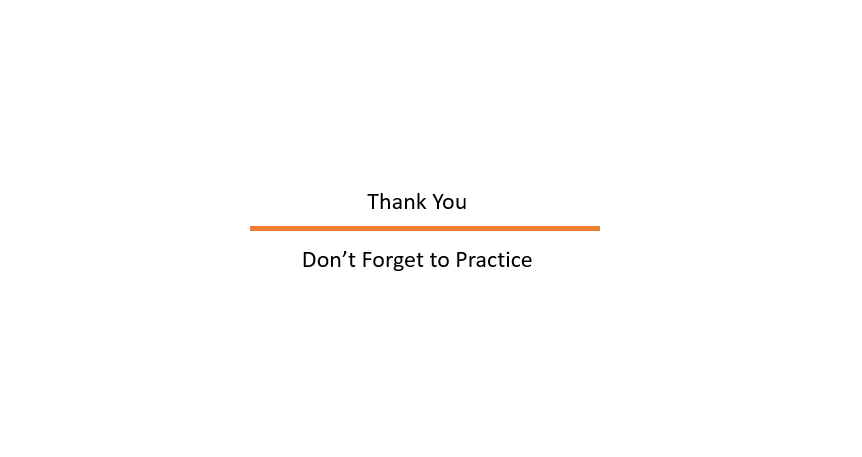